In [33]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [34]:
zip_codes = ['30082']
lagged_months = 12*3

In [35]:
df_rent = pd.read_csv('data/Zip_zori_sm_month.csv')
df_rent

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-03-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1497.424718,...,1842.220063,1868.047131,1873.817718,1878.928788,1858.462009,1840.580666,1837.859685,1866.420457,1878.317284,1879.541555
1,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1277.132974,...,1751.848602,1802.897432,1844.663002,1839.843822,1817.949304,1784.282291,1780.857238,1772.767233,1782.596162,1792.935784
2,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1213.896723,...,1829.508574,1855.754040,1844.563025,1836.608744,1829.236068,1832.788915,1818.796956,1825.326246,1824.967456,1828.388042
3,62093,5,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2002.268262,...,2690.483038,2767.820061,2844.072074,2850.187383,2849.302473,2818.582220,2771.866885,2723.280995,2722.922736,2746.429739
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1273.463572,1319.020253,1352.624832,1364.329298,1341.859387,1352.863897,1360.447722,1397.850669,1414.703422,1412.378205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6371,88839,27256,70836,zip,LA,LA,Baton Rouge,"Baton Rouge, LA",East Baton Rouge Parish,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306.666667
6372,62281,27793,11930,zip,NY,NY,Amagansett,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,...,NaN,NaN,24931.420268,21668.102634,24107.990438,23901.103350,25276.735012,32484.601391,45075.032800,60592.444444
6373,60648,28289,7311,zip,NJ,NJ,Jersey City,"New York-Newark-Jersey City, NY-NJ-PA",Hudson County,NaN,...,3764.270779,3885.981484,3937.951966,3900.895821,3801.104329,3745.986117,3728.190602,3731.656552,3737.212657,3741.898413
6374,418163,31650,89158,zip,NV,NV,Las Vegas,"Las Vegas-Henderson-Paradise, NV",Clark County,NaN,...,NaN,NaN,NaN,NaN,NaN,3651.520243,3707.929459,3996.015315,3945.173817,3983.000000


In [36]:
df_house = pd.read_csv('data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv')
df_house

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,102001,0,United States,country,NaN,95267.247722,95501.570028,96003.115587,96697.561769,97451.188078,...,345270.500861,345931.909738,343524.301359,340904.097445,339247.180814,336450.093882,332178.404741,331904.936262,332054.299088,334944.487880
1,394913,1,"New York, NY",msa,NY,149153.241240,148443.381709,148189.254572,148235.655384,148895.187236,...,580642.125351,581511.319081,579324.602669,575926.104509,573567.069180,570757.287522,564097.536690,568024.056476,568699.519079,571577.203175
2,753899,2,"Los Angeles, CA",msa,CA,183280.456933,184339.312509,185167.737258,185537.913010,186207.812373,...,931866.208689,922073.377178,903947.530429,890054.439585,881969.977690,873663.373977,861368.395792,855509.205821,856702.004941,866410.190071
3,394463,3,"Chicago, IL",msa,IL,120854.404479,120309.922839,121643.899593,123239.028675,124703.480009,...,298996.562405,299362.071945,296714.654210,294217.868925,292705.213204,290288.561472,286658.191347,288437.132132,287787.876070,289978.769434
4,394514,4,"Dallas, TX",msa,TX,111432.513727,112110.199117,113059.763181,113843.192374,114325.419349,...,390836.725915,390173.684600,385591.026741,381455.516366,378073.848413,373558.939102,367663.951009,365011.277711,364587.819562,366938.068177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,95539.006466,95318.118457,94136.330292,91777.002702,90576.583846,87550.342923,86327.653546,93346.988599,92737.852171,94176.659644
892,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,403485.359590,406208.354710,405215.525723,404842.998018,402404.470653,397782.152827,392538.666676,388839.695349,388914.963628,393193.400998
893,753874,937,"Craig, CO",msa,CO,68677.121531,69028.860822,69841.538035,70082.621402,71248.862455,...,263223.302103,266787.864930,268035.609322,268924.399343,270752.559797,270415.083448,268947.146345,268890.224076,272057.444951,277170.638081
894,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,73222.548096,73099.556220,72721.372777,72808.807728,71311.509154,69382.837049,68299.247815,NaN,73853.782154,74606.478620


In [37]:
def get_rent_evolution_by_zip(zip_code):
    df_zip = df_rent[df_rent['RegionName'] == int(zip_code)]
    if df_zip.empty:
        print(f'Zip code not found: {zip_code}')
        return (None, None, None)
    state = df_zip.iloc[0]['State']
    msa = df_zip.iloc[0]['Metro']
    df_zip = df_zip.iloc[:, 9:]
    df_zip = df_zip.T
    df_zip.dropna(inplace=True)
    df_zip.index = pd.to_datetime(df_zip.index)
    # print(df_zip.head())
    df_zip.columns = ['rent_index']
    df_zip['evolution'] = df_zip['rent_index'].pct_change(periods=12)
    df_zip['index_norm'] = df_zip['rent_index']/df_zip['rent_index'][0]
    return df_zip, state, msa

Zip code:  30082
Volatility of rent index:  5.93 %
Average rent index growth:  9.28 %
Sharp ratio:  1.56


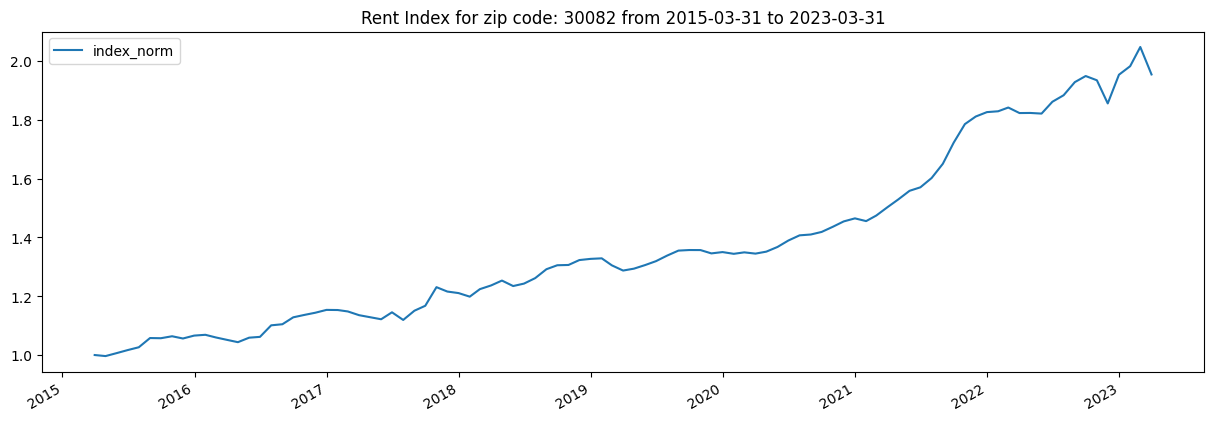

In [38]:

for zip_code in zip_codes:
    df_zip, state, msa = get_rent_evolution_by_zip(zip_code)
    if df_zip is None:
        continue
    begin_date = df_zip.index[0].strftime('%Y-%m-%d')
    end_date = df_zip.index[-1].strftime('%Y-%m-%d')
    df_zip[['index_norm']].plot(figsize=(15, 5), title=f'Rent Index for zip code: {zip_code} from {begin_date} to {end_date}')
    print('Zip code: ', zip_code)
    print('Volatility of rent index: ', round(df_zip['evolution'].std()*100 ,2), '%')
    print('Average rent index growth: ', round(df_zip['evolution'].mean()*100,2), '%')
    print('Sharp ratio: ', round(df_zip['evolution'].mean()/(df_zip['evolution'].std()),2))

In [39]:
# Find the price house index for the same zip code
model = SentenceTransformer('all-MiniLM-L6-v2')

# Filter the house price data by state and msa
df_house_state = df_house[df_house['StateName'] == state]
df_house_state.reset_index(inplace=True)
# df_house_msa = df_house_state[df_house_state['Metro'] == msa]
# print(msa)
query_embedding = model.encode(msa)
passage_embedding = model.encode(df_house_state['RegionName'].values)
df_house_state = df_house_state.iloc[int(util.cos_sim(query_embedding, passage_embedding).argmax())]
region_name = df_house_state['RegionName']
# print(region_name)
df_house_state = df_house_state.iloc[6:]
df_house_state.index = pd.to_datetime(df_house_state.index)
df_house_state = pd.DataFrame(df_house_state)
df_house_state.columns = ['house_index']
df_house_state['lagged_house_index'] = df_house_state['house_index'].shift(lagged_months)
df_house_state['index_norm'] = df_house_state['house_index']/df_house_state['house_index'][0]
begin_date = df_house_state.index[0].strftime('%Y-%m-%d')
end_date = df_house_state.index[-1].strftime('%Y-%m-%d')
df_house_state


,house_index,lagged_house_index,index_norm
1996-02-29,111777.581652,None,1.0
1996-03-31,112198.297178,None,1.003764
1996-04-30,113116.573112,None,1.011979
1996-05-31,114120.541134,None,1.020961
1996-06-30,115202.218709,None,1.030638
...,...,...,...
2022-11-30,367608.550902,243179.342739,3.28875
2022-12-31,362766.329508,243499.019793,3.24543
2023-01-31,361397.473432,244188.600619,3.233184
2023-02-28,360513.457414,245346.946985,3.225275


<AxesSubplot: title={'center': 'Area House Index for zip code: 30082 matched with MSA: Atlanta, GA from 1996-02-29 to 2023-03-31'}>

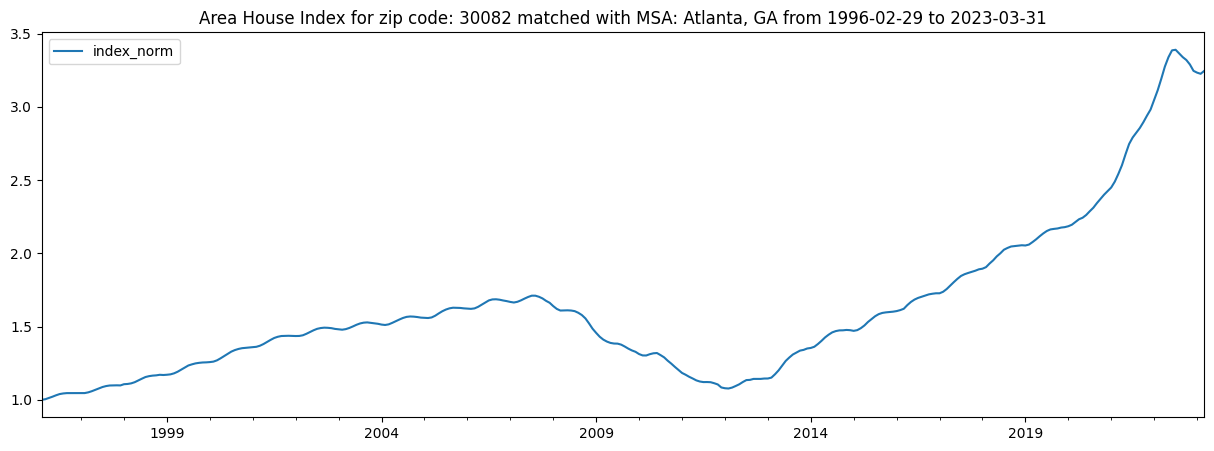

In [40]:
df_house_state[['index_norm']].plot(figsize=(15, 5), title=f'Area House Index for zip code: {zip_code} matched with MSA: {region_name} from {begin_date} to {end_date}')

In [41]:
df_house_rent = pd.merge(df_house_state, df_zip, left_index=True, right_index=True)
df_house_rent['rent_price_ratio'] = df_house_rent['rent_index']/df_house_rent['house_index']
df_house_rent['rent_price_ratio_lagged'] = df_house_rent['rent_index']/df_house_rent['lagged_house_index']
df_house_rent['rent_price_ratio'] = df_house_rent['rent_price_ratio']/df_house_rent['rent_price_ratio'][0]
df_house_rent['rent_price_ratio_lagged'] = df_house_rent['rent_price_ratio_lagged']/df_house_rent['rent_price_ratio_lagged'][0]
df_house_rent

,house_index,lagged_house_index,index_norm_x,rent_index,evolution,index_norm_y,rent_price_ratio,rent_price_ratio_lagged
2015-03-31,166410.620966,121072.921337,1.488766,953.491218,NaN,1.000000,1.0,1.0
2015-04-30,168472.648189,122278.448205,1.507213,950.082537,NaN,0.996425,0.984229,0.986601
2015-05-31,171155.991649,123581.548499,1.531219,959.759068,NaN,1.006574,0.978666,0.986141
2015-06-30,173383.488872,125315.264655,1.551147,969.446004,NaN,1.016733,0.975844,0.982313
2015-07-31,175529.793774,126806.469522,1.570349,978.679368,NaN,1.026417,0.973092,0.980007
...,...,...,...,...,...,...,...,...
2022-11-30,367608.550902,243179.342739,3.28875,1769.358983,0.024595,1.855664,0.84003,0.923889
2022-12-31,362766.329508,243499.019793,3.24543,1862.431945,0.069616,1.953276,0.89602,0.971211
2023-01-31,361397.473432,244188.600619,3.233184,1890.150288,0.083844,1.982347,0.9128,0.982882
2023-02-28,360513.457414,245346.946985,3.225275,1952.421076,0.111793,2.047655,0.945184,1.010469


<AxesSubplot: title={'center': 'Area House Index for zip code: 30082 matched with msa Atlanta, GA from 1996-02-29 to 2023-03-31'}>

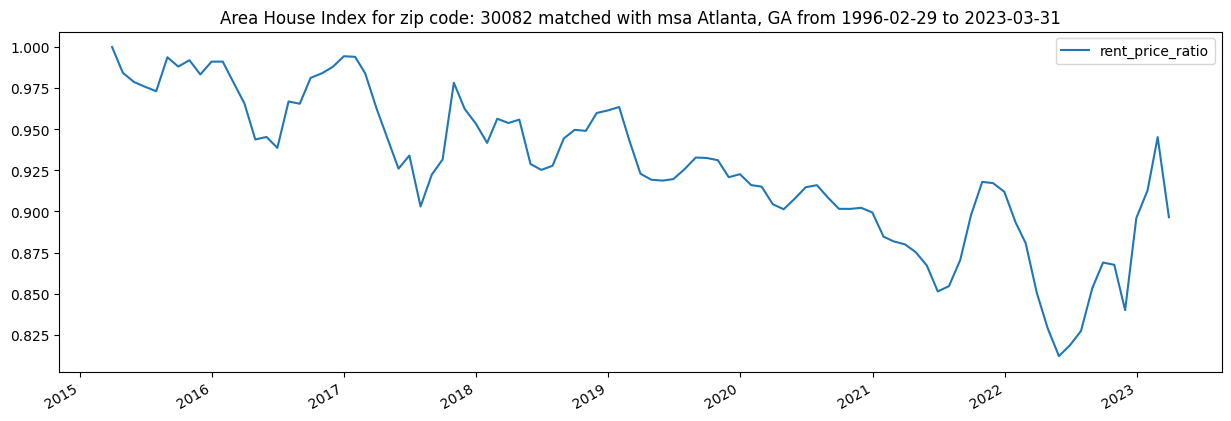

In [42]:
df_house_rent[['rent_price_ratio']].plot(figsize=(15, 5), title=f'Area House Index for zip code: {zip_code} matched with msa {region_name} from {begin_date} to {end_date}')

<AxesSubplot: title={'center': 'Area House Index for zip code: 30082 matched with msa Atlanta, GA from 1996-02-29 to 2023-03-31'}>

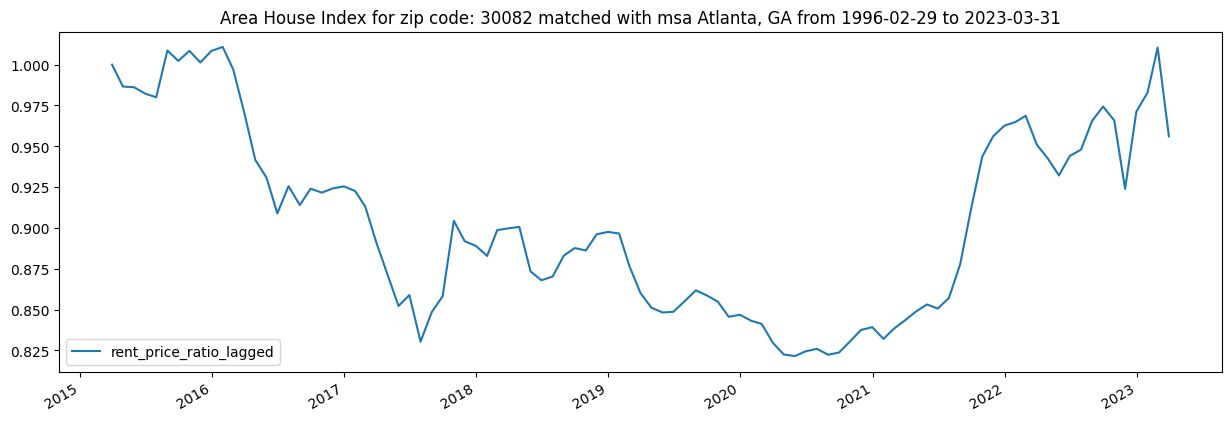

In [43]:
df_house_rent[['rent_price_ratio_lagged']].plot(figsize=(15, 5), title=f'Area House Index for zip code: {zip_code} matched with msa {region_name} from {begin_date} to {end_date}')
